In [1]:
#import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
#from scipy.optimize import fsolve
#from scipy.interpolate import interp1d
import math

In [2]:
!pwd

/home/eladio/Documentos/Potencial_exponencial/hi_class_exponencial/notebooks


In [46]:
# Definir parámetros cosmológicos comunes
k_out = [0.1]  # unidades de 1/Mpc

common_settings = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'Omega_b': 0.02238280,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    #'x0_schm': 1,
    'DM_schm': 0.26,
    'theta_schm':2.7e-17,
    'h_schm': 1,
    'V0_schm': 10,
    'lambda_schm': 0.5,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para theta_schm
x_variable = [ 1e-4, 1e-3, 1e-2, 1e-1]

# Background
z_all = []
#H_z_all = []
a_all = []
Omega_rad_all = []
Omega_bar_all = []
Omega_lambda_all = []
Omega_sch_all = []
w_sch_all = []
w_all = []
rho_rel_all = []
# Listas para perturbaciones lineales
clTT_all = []
clEE_all = []
clPP_all = []
Pk_all = []
ll_all = []
#kk_all = []  # Para almacenar los valores de k

# Ciclo para iterar sobre los diferentes valores de theta_schm
for x in x_variable:
    common_settings['x0_schm'] = x  # Actualizar el valor de theta_schm
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    #H_z = background['H [1/Mpc]']          # Hubble parameter H(z)
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']     # Densidad de energía de fotones 
    rad = rho_gamma + rho_nu              # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    w_sch = (p_sch - lamb) / (rho_sch + lamb)
    w = p_sch/rho_sch
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch
    
    Neff=((rho_rel-rho_gamma)/(rho_gamma))*(8/7)*(11/4)**(4/3)
    N_phi=3*(8/7)*(11/4)**(4/3)*( (1.23014e+10*2.7e-19**4)/(rho_gamma*a**4))

    # Guardar los resultados en las listas correspondientes
    z_all.append(z)
    #H_z_all.append(H_z)
    a_all.append(a)
    Omega_rad_all.append(Omega_rad)
    Omega_bar_all.append(Omega_bar)
    Omega_lambda_all.append(Omega_lambda)
    Omega_sch_all.append(Omega_sch)
    w_sch_all.append(w_sch)
    w_all.append(w)
    rho_rel_all.append(rho_rel)
    
    # Ahora obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all.append(clTT)
    clEE_all.append(clEE)
    clPP_all.append(clPP)
    ll_all.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k) y k
    #kk_all.append(kk)
    Pk_all.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()

# Ahora tienes todos los valores guardados en las listas
# Puedes hacer gráficas o análisis adicional aquí


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.29362
aquí voy y todo bien 2.82803
aquí voy y todo bien 2.06083
aquí voy y todo bien 2.13295
aquí voy y todo bien 2.09689
aquí voy y todo bien 2.13222
aquí voy y todo bien 2.11456
aquí voy y todo bien 2.13222
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28814
aquí voy y todo bien 2.73725
aquí voy y todo bien 2.0127
aquí voy y todo bien 2.08583
aquí voy y todo bien 2.04926
aquí voy y todo bien 2.08515
aquí voy y todo bien 2.06721
aquí voy y todo bien 2.08515
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28759
aquí voy y todo bien 2.72853
aquí voy y todo bien 2.00806
aquí voy y todo bien 2.08127
aquí voy y todo bien 2.04467
aquí voy y todo bien 2.08059
aquí voy y todo bien 2.08093
aquí voy y todo bien 2.08059
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72766
aquí voy y todo bien 2.00759
aquí voy y todo bien 2.08081
aquí 

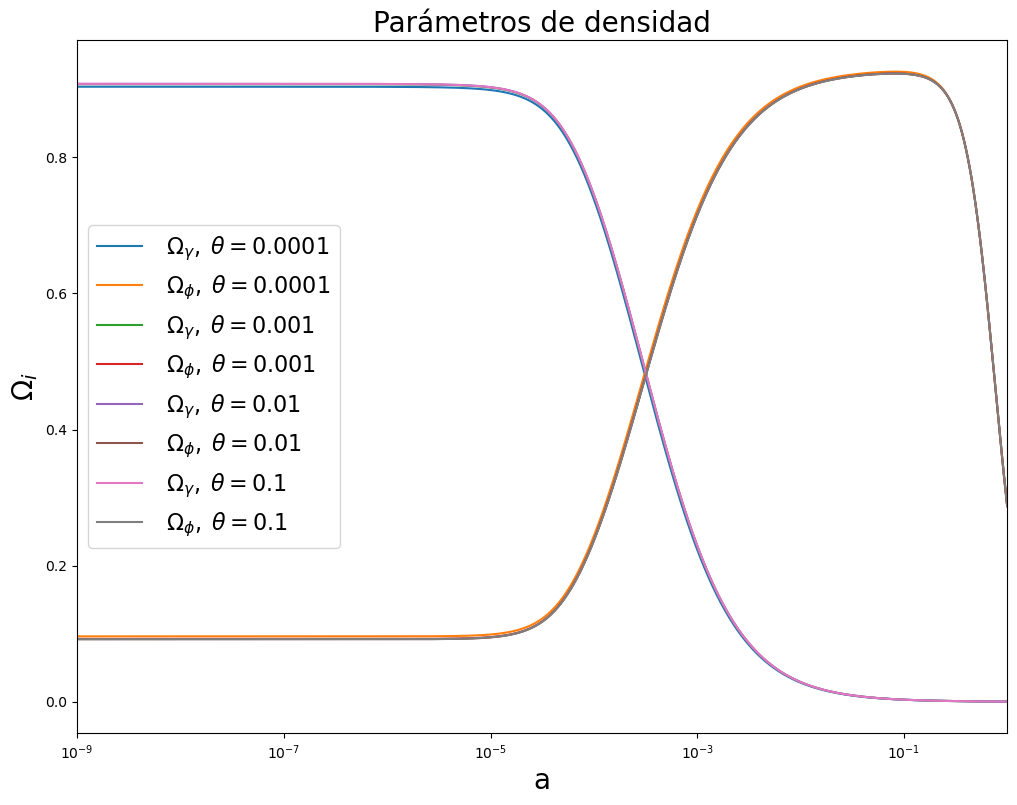

In [47]:
plt.figure(figsize=(12, 9))
#plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-9,1)
for i in range(len(Omega_rad_all)):
    plt.plot(a, Omega_rad_all[i], label = " $\Omega _{\gamma}, \; \\theta = $"+str(x_variable[i]))
    plt.plot(a, Omega_sch_all[i], label = " $\Omega _{\phi}, \; \\theta = $"+str(x_variable[i]))
    
#plt.plot(a0,Omega_lambda0+Omega_rad0+Omega_sch0+Omega_bar0,color="green",label="Constricción de Friedmann")
#plt.plot(a,Omega_rad,color="black",label="$\Omega _{\gamma}$")
#plt.plot(a,Omega_bar,color="red",label="$\Omega _{b}$")
#plt.plot(a,Omega_sch,"--",color="blue",label="$\Omega _{\phi DM}$")
#plt.plot(a,Omega_lambda, "--", color="purple" ,label="$\Omega _{\phi DE}$")
#plt.plot(a,Omega_sch + Omega_lambda, color="blue",label="$\Omega _{\phi}$")


#plt.plot(a,Omega_lambda+Omega_cdm+Omega_bar+Omega_rad,color="black",label="$\Omega _{total}$")
plt.title('Parámetros de densidad', fontsize=20)
plt.xlabel('a',fontsize=20)
plt.ylabel('$\Omega _{i}$',fontsize=20)
plt.legend(fontsize=16)

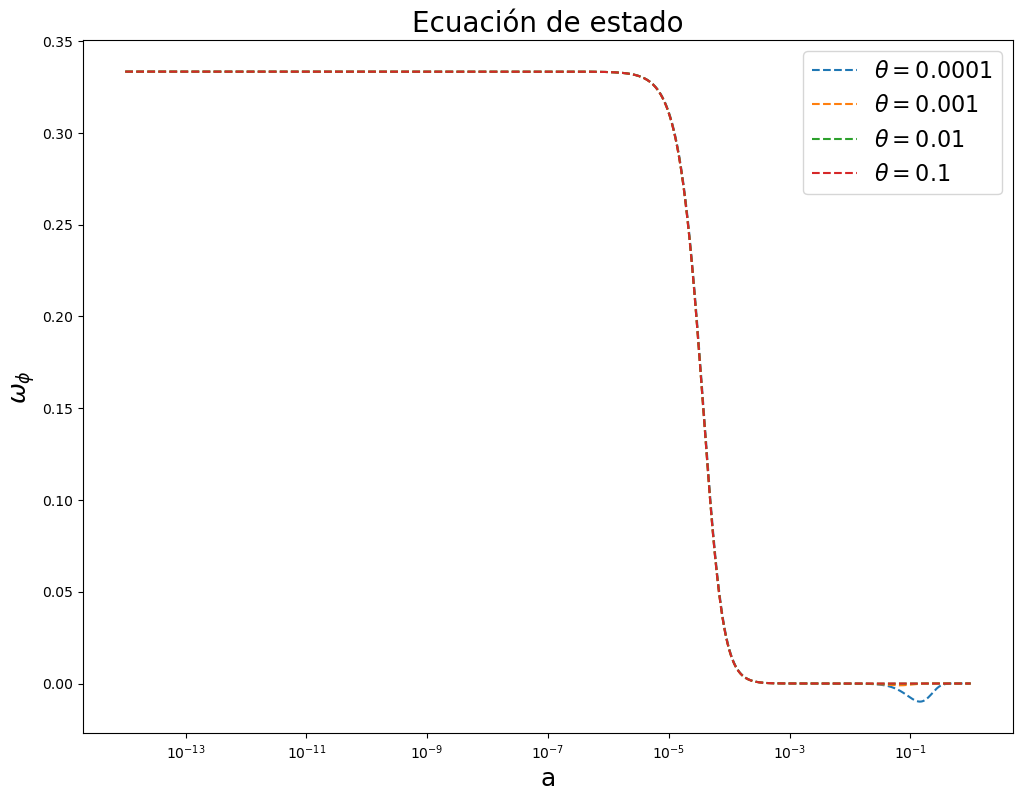

In [48]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i in range(len(Omega_rad_all)):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a,w_all[i],"--",label="$\\theta = $"+str(x_variable[i]))


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

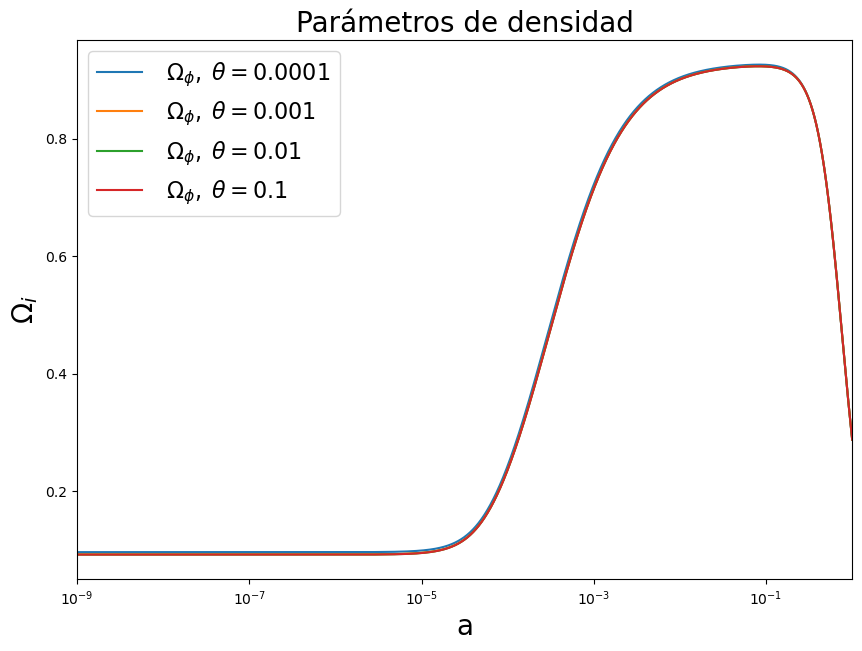

In [49]:
plt.figure(figsize=(10, 7))
#plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-9,1)
for i in range(len(Omega_rad_all)):
    #plt.plot(a, Omega_rad_all[i], label = " $\Omega _{\gamma}, \; \\theta = $"+str(x_variable[i]))
    plt.plot(a, Omega_sch_all[i], label = " $\Omega _{\phi}, \; \\theta = $"+str(x_variable[i]))
plt.title('Parámetros de densidad', fontsize=20)
plt.xlabel('a',fontsize=20)
plt.ylabel('$\Omega _{i}$',fontsize=20)
plt.legend(fontsize=16)

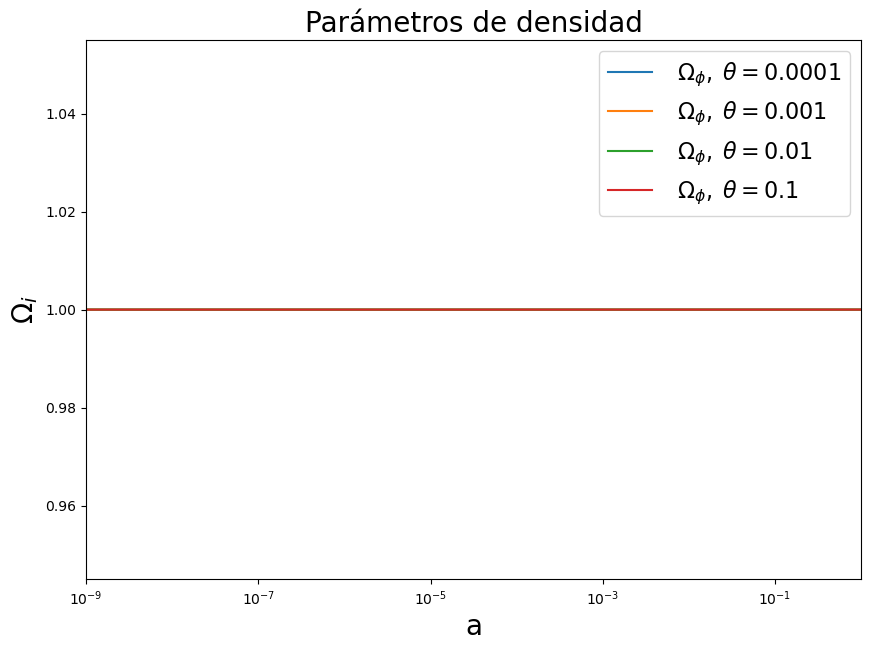

In [50]:
plt.figure(figsize=(10, 7))
#plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-9,1)
for i in range(len(Omega_rad_all)):
    #plt.plot(a, Omega_rad_all[i], label = " $\Omega _{\gamma}, \; \\theta = $"+str(x_variable[i]))
    plt.plot(a, Omega_sch_all[i]+Omega_rad_all[i]+Omega_bar_all[i]+Omega_lambda_all[i], label = " $\Omega _{\phi}, \; \\theta = $"+str(x_variable[i]))
plt.title('Parámetros de densidad', fontsize=20)
plt.xlabel('a',fontsize=20)
plt.ylabel('$\Omega _{i}$',fontsize=20)
plt.legend(fontsize=16)

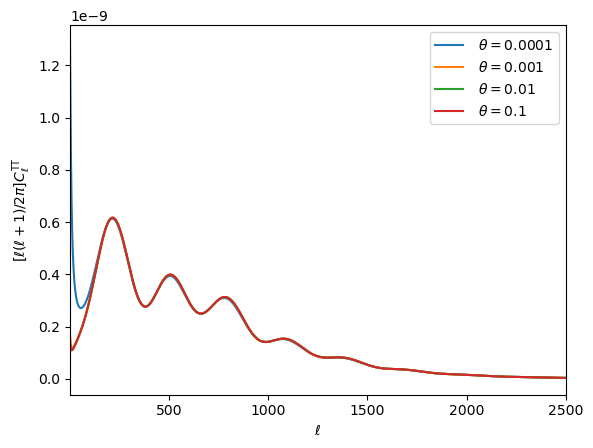

In [51]:
# plot C_l^TT
from math import pi
plt.figure(1)
#plt.xscale('log');
plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i in range(len(ll_all)):
    plt.plot(ll_all[i],clTT_all[i]*ll_all[i]*(ll_all[i]+1)/2./pi,label = " $\\theta = $"+str(x_variable[i]))
plt.legend()

In [52]:
# create instance of the class "Class"
LambdaCDM1 = Class()
# pass input parameters
LambdaCDM1.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})
LambdaCDM1.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM1.compute()

In [53]:
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk1 = [] # P(k) in (Mpc/h)**3
h1 = LambdaCDM1.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk1.append(LambdaCDM1.pk(k*h1,0.)*h**3) # function .pk(k,z)

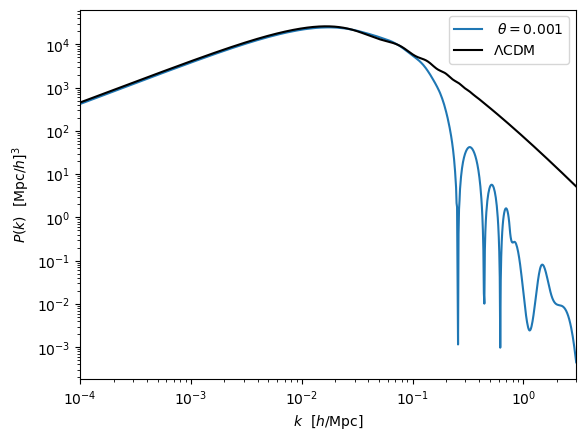

In [54]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i in range(1,2):#range(len(Pk_all)):
 plt.plot(kk,Pk_all[i], label = " $\\theta = $"+str(x_variable[i]))
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

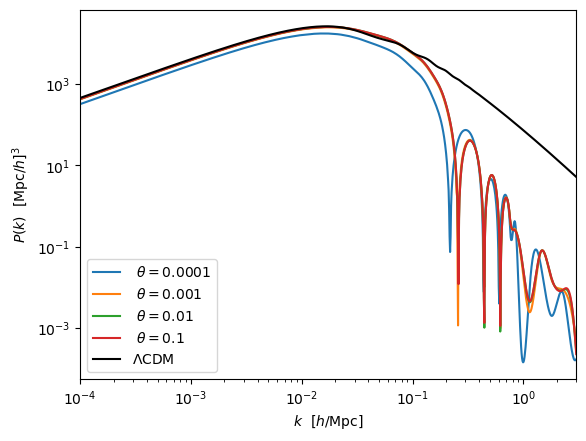

In [55]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i in range(len(Pk_all)):
 plt.plot(kk,Pk_all[i], label = " $\\theta = $"+str(x_variable[i]))
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()

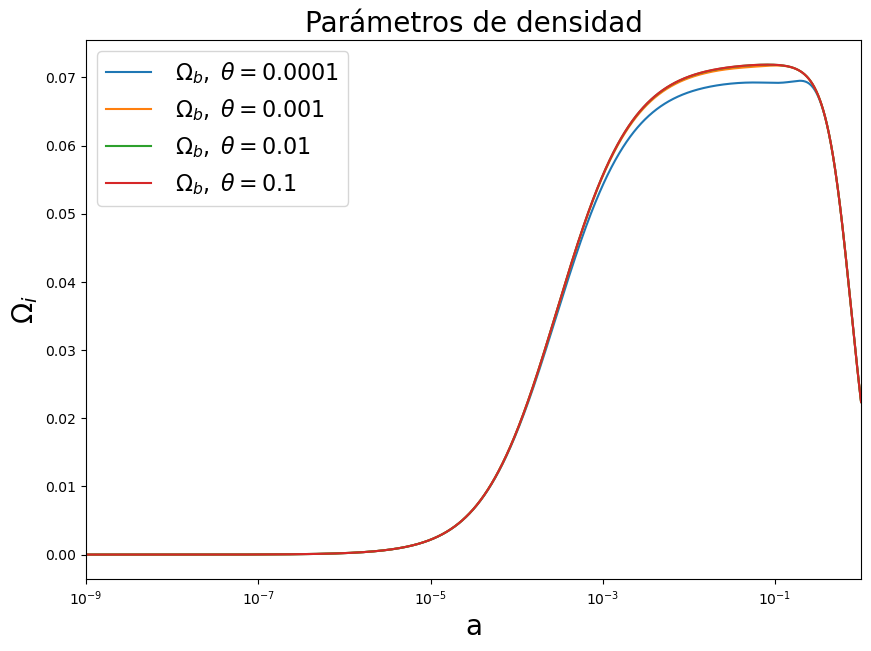

In [56]:
plt.figure(figsize=(10, 7))
#plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-9,1)
for i in range(len(Omega_rad_all)):
    #plt.plot(a, Omega_rad_all[i], label = " $\Omega _{\gamma}, \; \\theta = $"+str(x_variable[i]))
    plt.plot(a, Omega_bar_all[i], label = " $\Omega _{b}, \; \\theta = $"+str(x_variable[i]))
plt.title('Parámetros de densidad', fontsize=20)
plt.xlabel('a',fontsize=20)
plt.ylabel('$\Omega _{i}$',fontsize=20)
plt.legend(fontsize=16)

In [13]:
k_out=[0.1]#unidades de 1/Mpc

common_settings = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                  'output':'mPk,tCl,pCl,lCl',
                   'P_k_max_1/Mpc':3.0,
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': str(k_out).strip('[]'),
                   # LambdaCDM parameters
                   'h':0.6732117,
                   'Omega_fld' : 0,
                   'Omega_smg' : -1,
                   'Omega_Lambda': 0.69,
                   'Omega_b':0.02238280,
                   'Omega_cdm':0,
                   'gravity_model':'quintessence_monomial',
                   #'x0_schm':1,
                   #'theta_schm':2.7e-16,
                   'DM_schm':0.26,
                   'h_schm':1,
                   'V0_schm':0,
                   'lambda_schm':0,
                   #'m_phi_schm':1e-14,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                  # 'YHe': 0.2454006,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   #'lensing':'yes'
                    }



In [14]:
x_variable = [1e-14,1e-15,1e-16,1e-17,1e-18]
m1=[]
for x in x_variable:
    common_settings['theta_schm']=x
    m1.append(Class())
    m1[-1].set(common_settings)
    m1[-1].compute()
    

aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72756
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí voy y todo bien 2.04415
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06212
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí voy y todo bien 2.04415
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06212
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí voy y todo bien 2.04415
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06212
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí

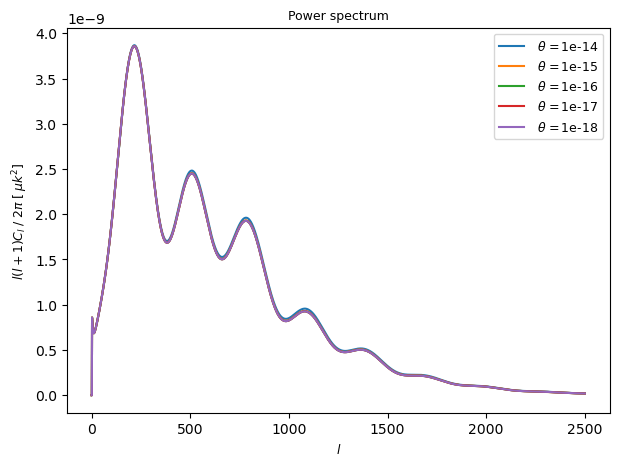

In [15]:
plt.figure(figsize=(7, 5))
for i in range(len(x_variable)):
    pert = m1[i].raw_cl()
    tt = pert['tt']
    ell = pert['ell']
    
    plt.plot(ell,(ell*(ell +1))*tt,label=" $ \\theta = $"+str(x_variable[i]))
    
plt.title('Power spectrum', fontsize=9)
plt.xlabel('$l$',fontsize=9)
plt.ylabel('$l(l+1)C_{l} \;/\;2\pi \;$[$\; \mu k^{2}$]',fontsize=9)    
plt.legend(fontsize=9)

In [16]:
k_out=[0.1]#unidades de 1/Mpc

In [17]:
k_out=[0.1]#unidades de 1/Mpc

common_settings = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                  'output':'mPk,tCl,pCl,lCl',
                   'P_k_max_1/Mpc':3.0,
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': str(k_out).strip('[]'),
                   # LambdaCDM parameters
                   'h':0.6732117,
                   'Omega_fld' : 0,
                   'Omega_smg' : -1,
                   'Omega_Lambda': 0.69,
                   'Omega_b':0.02238280,
                   'Omega_cdm':0,
                   'gravity_model':'quintessence_monomial',
                   'x0_schm':1,
                   'theta_schm':2.7e-16,
                   'DM_schm':0.26,
                   'h_schm':1,
                   #'V0_schm':v_variable,
                   'lambda_schm':1,
                   #'m_phi_schm':1e-14,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                  # 'YHe': 0.2454006,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   #'lensing':'yes'
                    }



In [18]:
v_variable = [-100,-3,-1,1, 1e6]
m=[]
for v in v_variable:
    common_settings['V0_schm']=v
    m.append(Class())
    m[-1].set(common_settings)
    m[-1].compute()
    
    

aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28752
aquí voy y todo bien 2.72752
aquí voy y todo bien 2.00752
aquí voy y todo bien 2.08075
aquí voy y todo bien 2.04413
aquí voy y todo bien 2.08007
aquí voy y todo bien 2.08041
aquí voy y todo bien 2.08007
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí voy y todo bien 2.04415
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06211
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí voy y todo bien 2.04415
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06211
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí

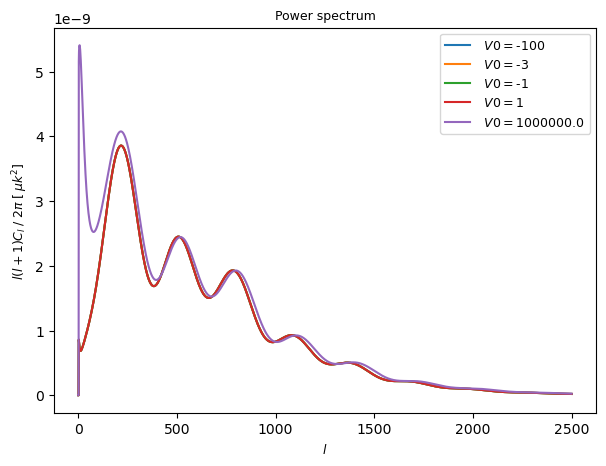

In [27]:
plt.figure(figsize=(7, 5))
for i in range(len(v_variable)):
    pert = m[i].raw_cl()
    tt = pert['tt']
    ell = pert['ell']
    
    plt.plot(ell,(ell*(ell +1))*tt,label=" $ V0 = $"+str(v_variable[i]))
    
plt.title('Power spectrum', fontsize=9)
plt.xlabel('$l$',fontsize=9)
plt.ylabel('$l(l+1)C_{l} \;/\;2\pi \;$[$\; \mu k^{2}$]',fontsize=9)    
plt.legend(fontsize=9)

In [20]:
common_settings1 = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                  'output':'mPk,tCl,pCl,lCl',
                   'P_k_max_1/Mpc':3.0,
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': str(k_out).strip('[]'),
                   # LambdaCDM parameters
                   'h':0.6732117,
                   'Omega_fld' : 0,
                   'Omega_smg' : -1,
                   'Omega_Lambda': 0.69,
                   'Omega_b':0.02238280,
                   'Omega_cdm':0,
                   'gravity_model':'quintessence_monomial',
                   #'x0_schm':1,
                   'theta_schm':2.7e-16,
                   'DM_schm':0.26,
                   'h_schm':1,
                   'V0_schm':1,
                   'lambda_schm':1,
                   #'m_phi_schm':1e-14,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                  # 'YHe': 0.2454006,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   #'lensing':'yes'
                    }


In [21]:
x_variable = [0.001,1,1e2]
m1=[]
for x in x_variable:
    common_settings1['x0_schm']=x
    m1.append(Class())
    m1[-1].set(common_settings1)
    m1[-1].compute()
    

aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28754
aquí voy y todo bien 2.72779
aquí voy y todo bien 2.00766
aquí voy y todo bien 2.08089
aquí voy y todo bien 2.04428
aquí voy y todo bien 2.08021
aquí voy y todo bien 2.06224
aquí voy y todo bien 2.08021
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí voy y todo bien 2.04415
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.08042
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí voy y todo bien 2.04415
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06212
aquí voy y todo bien 2.08008


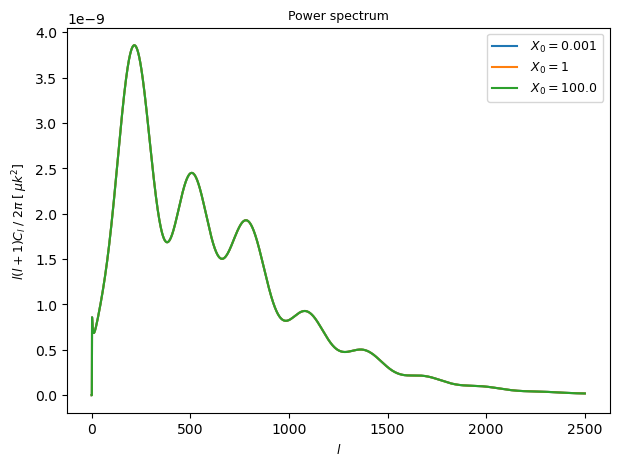

In [22]:
plt.figure(figsize=(7, 5))
for i in range(len(x_variable)):
    pert = m1[i].raw_cl()
    tt = pert['tt']
    ell = pert['ell']
    
    plt.plot(ell,(ell*(ell +1))*tt,label=" $ X_0 = $"+str(x_variable[i]))
    
plt.title('Power spectrum', fontsize=9)
plt.xlabel('$l$',fontsize=9)
plt.ylabel('$l(l+1)C_{l} \;/\;2\pi \;$[$\; \mu k^{2}$]',fontsize=9)    
plt.legend(fontsize=9)

In [25]:
common_settings2 = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                  'output':'mPk,tCl,pCl,lCl',
                   'P_k_max_1/Mpc':3.0,
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': str(k_out).strip('[]'),
                   # LambdaCDM parameters
                   'h':0.6732117,
                   'Omega_fld' : 0,
                   'Omega_smg' : -1,
                   'Omega_Lambda': 0.69,
                   'Omega_b':0.02238280,
                   'Omega_cdm':0,
                   'gravity_model':'quintessence_monomial',
                   #'x0_schm':1,
                   'theta_schm':2.7e-17,
                   'DM_schm':0.26,
                   'h_schm':1,
                   'V0_schm':1,
                   'lambda_schm':1,
                   #'m_phi_schm':1e-14,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                  # 'YHe': 0.2454006,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   #'lensing':'yes'
                    }


In [26]:
theta_variable = [0.0001,0.001,0.01,0.1,1, 10, 100, 1000]
m2=[]
for x in theta_variable:
    common_settings2['x0_schm']=x
    m2.append(Class())
    m2[-1].set(common_settings2)
    m2[-1].compute()

aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28768
aquí voy y todo bien 2.72996
aquí voy y todo bien 2.00882
aquí voy y todo bien 2.08202
aquí voy y todo bien 2.04542
aquí voy y todo bien 2.08134
aquí voy y todo bien 2.08168
aquí voy y todo bien 2.08134
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28754
aquí voy y todo bien 2.72779
aquí voy y todo bien 2.00767
aquí voy y todo bien 2.08089
aquí voy y todo bien 2.04428
aquí voy y todo bien 2.08021
aquí voy y todo bien 2.06224
aquí voy y todo bien 2.08021
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72757
aquí voy y todo bien 2.00755
aquí voy y todo bien 2.08077
aquí voy y todo bien 2.04416
aquí voy y todo bien 2.0801
aquí voy y todo bien 2.06213
aquí voy y todo bien 2.0801
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí v

In [ ]:
plt.figure(figsize=(7, 5))
for i in range(len(theta_variable)):
    pert = m2[i].raw_cl()
    tt = pert['tt']
    ell = pert['ell']
    
    plt.plot(ell,(ell*(ell +1))*tt,label=" $ \\theta = $"+str(theta_variable[i]))
    
plt.title('Power spectrum', fontsize=9)
plt.xlabel('$l$',fontsize=9)
plt.ylabel('$l(l+1)C_{l} \;/\;2\pi \;$[$\; \mu k^{2}$]',fontsize=9)    
plt.legend(fontsize=9)

In [ ]:
common_settings3 = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                  'output':'mPk,tCl,pCl,lCl',
                   'P_k_max_1/Mpc':3.0,
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': str(k_out).strip('[]'),
                   # LambdaCDM parameters
                   'h':0.6732117,
                   'Omega_fld' : 0,
                   'Omega_smg' : -1,
                   'Omega_Lambda': 0.69,
                   'Omega_b':0.02238280,
                   'Omega_cdm':0,
                   'gravity_model':'quintessence_monomial',
                   'x0_schm':1,
                   'theta_schm':2.7e-16,
                   'DM_schm':0.26,
                   'h_schm':1,
                   'V0_schm':1000,
                   #'lambda_schm':1,
                   #'m_phi_schm':1e-14,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                  # 'YHe': 0.2454006,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   #'lensing':'yes'
                    }


In [ ]:
lambda_variable = [0.01,1e-1,1,10,100]
m3=[]
for x in lambda_variable:
    common_settings3['lambda_schm']=x
    m3.append(Class())
    m3[-1].set(common_settings3)
    m3[-1].compute()

In [ ]:
plt.figure(figsize=(7, 5))
for i in range(len(lambda_variable)):
    pert = m3[i].raw_cl()
    tt = pert['tt']
    ell = pert['ell']
    
    plt.plot(ell,(ell*(ell +1))*tt,label=" $ \\lambda= $"+str(lambda_variable[i]))
    
plt.title('Power spectrum', fontsize=9)
plt.xlabel('$l$',fontsize=9)
plt.ylabel('$l(l+1)C_{l} \;/\;2\pi \;$[$\; \mu k^{2}$]',fontsize=9)    
plt.ylim(0,0.5e-8)
plt.legend(fontsize=9)

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(l2, ((2.726e6)**2)*TT2,"--", color="green",label=" $ V0 = -1^5$")
plt.title('Power spectrum', fontsize=20)
plt.xlabel('$l$',fontsize=22)
plt.ylabel('$l(l+1)C_{l} \;/\;2\pi \;$[$\; \mu k^{2}$]',fontsize=22)
plt.legend(fontsize=20)

In [ ]:
!ls

In [ ]:
k_out=[0.1]#unidades de 1/Mpc

common_settings = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                  'output':'mPk,tCl,pCl,lCl',
                'write parameters' : 'yes',
                   'P_k_max_1/Mpc':1.0,
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': str(k_out).strip('[]'),
                   # LambdaCDM parameters
                   #'h':0.6732117,
                   'Omega_fld' : 0,
                   'Omega_smg' : -1,
                   'Omega_Lambda': 0.69,
                   'omega_b': 0.02377,# 0.02238280
                   'omega_cdm':0,
                   'gravity_model':'quintessence_monomial',
                   'x0_schm':1,
                   'theta_schm':2.7e-16,
                   'DM_schm':0.26,
                   'h_schm':1,
                   'V0_schm':10,
                   'lambda_schm':1,
                   '100*theta_s': 1.04110,
                   #'m_phi_schm':1e-14,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                    'N_ur' : 2.0328,
                    'N_ncdm' : 1,
                    'm_ncdm' : 0.06,
                    'T_ncdm': 0.71611,
                    'non linear' : 'halofit',
                    'l_max_scalars' : 2508,
                
    
                # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                  # 'YHe': 0.2454006,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   'lensing':'yes'
                    }

In [ ]:
m=Class()
m.set(common_settings)
m.compute()

In [ ]:
k_out=[0.1]#unidades de 1/Mpc

common_settings2 = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                  'output':'mPk,tCl,pCl,lCl',
                   'P_k_max_1/Mpc':1.0,
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values': str(k_out).strip('[]'),
                   # LambdaCDM parameters
                   'h':0.6732117,
                   'Omega_fld' : 0.12,
                   'Omega_smg' : -1,
                   'Omega_Lambda': 0.5846849328544768,
                   'Omega_b':0.022656793744057567,
                   'Omega_cdm':0,
                   'gravity_model':'quintessence_monomial',
                   'x0_schm':290718.4598444844,
                   #'theta_schm':2.7e-16,
                   'DM_schm':0.26,
                   'h_schm':2,
                   'V0_schm':729427.1595930249,
                   'lambda_schm':209255.66705048186,
                   #'m_phi_schm':1e-18,
                   'A_s':2.0994417862196624e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                  # 'YHe': 0.2454006,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   #'lensing':'yes'
                    }



In [ ]:
m=Class()
m.set(common_settings2)
m.compute()